In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as pl
%matplotlib inline

from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, fbeta_score, f1_score, precision_score, recall_score

import seaborn


In [51]:
data=pd.read_csv("creditcard.csv")

In [52]:
print data.shape
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [55]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E3B1CC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001577ABA8>], dtype=object)

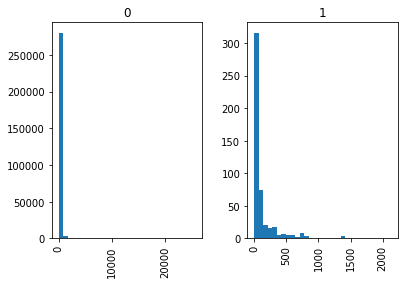

In [13]:
data.hist(column="Amount",by="Class",bins=30)

In [56]:
class_raw = data['Class']
features_raw = data.drop('Class', axis = 1)

skewed = ['Amount']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

In [57]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [58]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize a scaler, then apply it to the features
scaler = StandardScaler() 
numerical = list(features_log_transformed.columns.values)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,1.124303
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-1.114639
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.682368
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,1.009339
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,0.670241


In [59]:
features_final = pd.get_dummies(features_log_minmax_transform)
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
fraud = encoder.fit_transform(class_raw)

30 total features after one-hot encoding.


In [60]:
sample_size= len(fraud)/10

features_final = features_final[:sample_size]
fraud = fraud[:sample_size]

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    fraud, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 22784 samples.
Testing set has 5696 samples.


In [61]:
def train_predict(learner, X_train, y_train, X_test, y_test):
    
    results = {}
    
    learner = learner.fit(X_train,y_train)
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)

    results['acc_train'] = accuracy_score(y_train,predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)

    results['f1_train'] = f1_score(y_train,predictions_train)
    results['f1_test'] = f1_score(y_test,predictions_test)
    
    results['cv_train_acc'] = cross_validation.cross_val_score(learner, X_train, y_train, cv=5, scoring='accuracy')
    results['cv_train_auc'] = cross_validation.cross_val_score(learner, X_train, y_train, cv=5, scoring='roc_auc')
       
    print "{} : {} samples are trained.".format(learner.__class__.__name__, len(X_train))
    return results

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf_A = AdaBoostClassifier()
clf_B = DecisionTreeClassifier()
clf_C = GradientBoostingClassifier()
clf_D = RandomForestClassifier()

results = {}
for clf in [clf_A, clf_B, clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)
    print results[clf_name]

AdaBoostClassifier : 22784 samples are trained.
{'f1_test': 0.80000000000000004, 'f1_train': 0.99310344827586206, 'acc_train': 0.9999561095505618, 'cv_train_acc': array([ 0.99956121,  0.99890279,  0.99934167,  0.99890255,  0.99890255]), 'acc_test': 0.9987710674157303, 'cv_train_auc': array([ 0.95911659,  0.99967709,  0.9984148 ,  0.96480468,  0.91952884])}
DecisionTreeClassifier : 22784 samples are trained.
{'f1_test': 0.90476190476190477, 'f1_train': 1.0, 'acc_train': 1.0, 'cv_train_acc': array([ 0.99934182,  0.9984639 ,  0.99934167,  0.99868306,  0.99868306]), 'acc_test': 0.9992977528089888, 'cv_train_auc': array([ 0.93333333,  0.89955967,  0.93322325,  0.92813109,  0.85681261])}
GradientBoostingClassifier : 22784 samples are trained.
{'f1_test': 0.77777777777777768, 'f1_train': 1.0, 'acc_train': 1.0, 'cv_train_acc': array([ 0.99934182,  0.99912223,  0.99890279,  0.99890255,  0.99824407]), 'acc_test': 0.9985955056179775, 'cv_train_auc': array([ 0.93312789,  0.99028328,  0.98869074,  

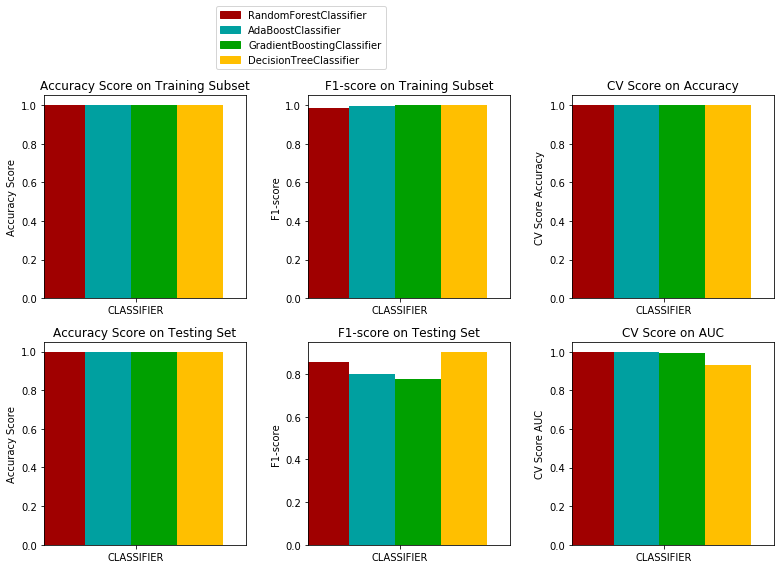

In [64]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


fig, ax = pl.subplots(2, 3, figsize = (11,7))

# Constants
bar_width = 0.5
colors = ['#A00000','#00A0A0','#00A000','#FFBF00']

# Super loop to plot four panels of data
for k, learner in enumerate(results.keys()):
    for j, metric in enumerate(['acc_train', 'f1_train', 'cv_train_acc', 'acc_test', 'f1_test', 'cv_train_auc']):
#        for i in np.arange(3):
            # Creative plot code
        ax[j/3, j%3].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])      
        ax[j/3, j%3].set_xticks([0.8])
        ax[j/3, j%3].set_xticklabels(["CLASSIFIER"])
        ax[j/3, j%3].set_xlim((-0.2, 2.0))

# Add unique y-labels
ax[0, 0].set_ylabel("Accuracy Score")
ax[0, 1].set_ylabel("F1-score")
ax[0, 2].set_ylabel("CV Score Accuracy")

ax[1, 0].set_ylabel("Accuracy Score")
ax[1, 1].set_ylabel("F1-score")
ax[1, 2].set_ylabel("CV Score AUC")

# Add titles
ax[0, 0].set_title("Accuracy Score on Training Subset")
ax[0, 1].set_title("F1-score on Training Subset")
ax[0, 2].set_title("CV Score on Accuracy")
ax[1, 0].set_title("Accuracy Score on Testing Set")
ax[1, 1].set_title("F1-score on Testing Set")
ax[1, 2].set_title("CV Score on AUC")

patches = []
for i, learner in enumerate(results.keys()):
    patches.append(mpatches.Patch(color = colors[i], label = learner))

    pl.legend(handles = patches, bbox_to_anchor = (-.9, 2.5), \
           loc = 'right', fontsize = 'medium')

# Aesthetics
pl.tight_layout()
pl.show()

In [22]:
def modelfit(alg, X_train, y_train, X_test, y_test, predictors, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    y_pred = alg.predict(X_test)
    y_predprob = alg.predict_proba(X_test)[:,1]
    
    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=5, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob)
    
    print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
                
    #Print Feature Importance:
    feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    pl.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9991
AUC Score (Train): 0.974841
CV Score : Mean - 0.9573223 | Std - 0.05274695 | Min - 0.8565767 | Max - 0.999978


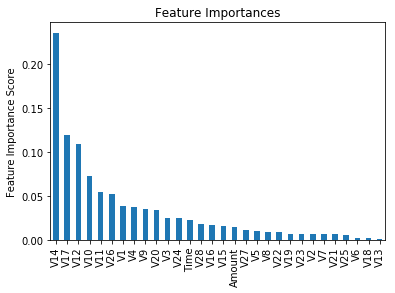

In [65]:
gbm0 = RandomForestClassifier(random_state=42)
predictors = [x for x in X_train.columns]
#print predictors
modelfit(gbm0, X_train, y_train, X_test, y_test, predictors)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014F628D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001560E828>], dtype=object)

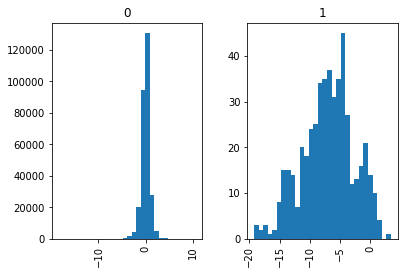

In [66]:
data.hist(column="V14",by="Class",bins=30)

In [67]:
param_test1 = {'n_estimators':range(40,121,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, 
                                                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                                           bootstrap=True, oob_score=False, n_jobs=1, random_state=42,
                                                           warm_start=False, class_weight=None), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.96391342181963058)

In [68]:
param_test2 = {'max_depth':range(1,20,2)}#, 'min_samples_split':range(2,11,1)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(criterion='gini', n_estimators=80, 
                                                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                                           bootstrap=True, oob_score=False, n_jobs=1, random_state=42, 
                                                           warm_start=False, class_weight=None), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)

gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 3}, 0.98498333212660505)

In [69]:
param_test3 = {'min_samples_split':range(2,11,1)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(criterion='gini', n_estimators=80, max_depth=3,
                                                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                                           bootstrap=True, oob_score=False, n_jobs=1, random_state=42, 
                                                           warm_start=False, class_weight=None), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [70]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_split': 10}, 0.98795894597408151)

In [71]:
model_final = RandomForestClassifier(criterion='gini', n_estimators=80, max_depth=3, min_samples_split=10,
                                                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                                           bootstrap=True, oob_score=False, n_jobs=1, random_state=42, 
                                                           warm_start=False, class_weight=None)


Model Report
Accuracy : 0.9984
AUC Score (Train): 0.993054
CV Score : Mean - 0.9879589 | Std - 0.01264187 | Min - 0.9666368 | Max - 0.999956


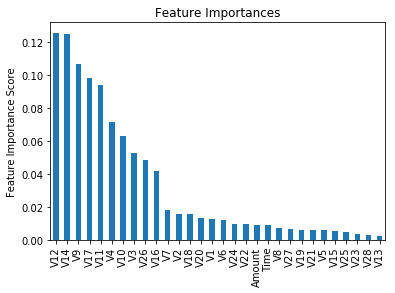

In [72]:
modelfit(model_final, X_train, y_train, X_test, y_test, predictors)

In [73]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(22784, 30)
(22784L,)
(5696, 30)
(5696L,)


In [74]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    pl.figure()
    pl.title(title)
    if ylim is not None:
        pl.ylim(*ylim)
    pl.xlabel("Training examples")
    pl.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    pl.grid()

    pl.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    pl.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    pl.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    pl.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    pl.legend(loc="best")
    return pl

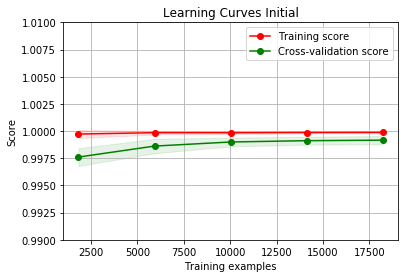

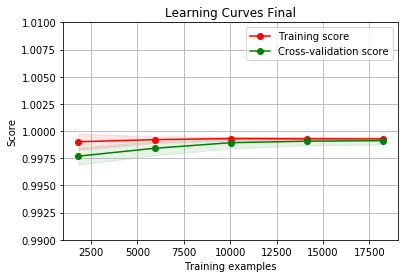

In [44]:
digits = load_digits()
X, y = X_train, y_train

#fig, ax = pl.subplots(1, 2, figsize = (11,7))

title = "Learning Curves Initial"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

estimator = gbm0
plot_learning_curve(estimator, title, X, y, ylim=(0.99, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves Final"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = model_final
plot_learning_curve(estimator, title, X, y, (0.99, 1.01), cv=cv, n_jobs=4)

pl.show()

In [49]:
yy_pred = model_final.predict(X_test)
yy_predprob = model_final.predict_proba(X_test)[:,1]

print "Accuracy : %.4g" % metrics.accuracy_score(y_test, yy_pred)
print "AUC Score : %f" % metrics.roc_auc_score(y_test, yy_pred)
print "AUC Score (Predprob): %f" % metrics.roc_auc_score(y_test, yy_predprob)

Accuracy : 0.9984
AUC Score : 0.799912
AUC Score (Predprob): 0.993054
